In [65]:
from QAOA.qaoa_src.Ansatz import *
from scipy.optimize import minimize
from qiskit.visualization import plot_histogram

In [66]:
# Generating random graph 
n = 3
rng_seed = int(np.random.randint(0,2**32-1))
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
edge_list = generate_random_graph(nodes=n,weighted=False,w_min=1e-2,seed=rng_seed)

 # tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(edge_list)


Best solution = [0 0 1] cost = -2.0


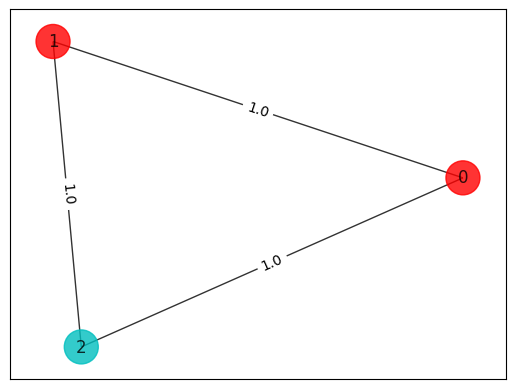

In [67]:
# Computing the weight dict from the random graph
w_dict = {}
for i, j, weight in edge_list:
    w_dict[(i,j)] = weight

# Calculating optimal partition and plotting
best_cost, best_perm = qubo_min_cost_partition(nr_nodes=n,Q_mat=get_qubo(size=n,edges=edge_list))
colors = ["r" if best_perm[i] == 0 else "c" for i in range(n)]
print("\nBest solution = " + str(best_perm) + " cost = " + str(best_cost))
pos = nx.spring_layout(G)
draw_graph(G, colors, pos)


In [68]:
# Defining instance of QAOA circuit
QUBO_mat = get_qubo(size=n,edges=edge_list)
QUBO_dict = {}
for row in range(QUBO_mat.shape[0]):
    for col in range(QUBO_mat.shape[1]):
        if QUBO_mat[row, col] != 0.0: 
            QUBO_dict[(row,col)] = QUBO_mat[row,col] 

QAOA_objective = QAOAansatz(n_qubits=n,qubo_edges=QUBO_dict)

In [71]:
p=1

theta_i = np.random.uniform(low=-np.pi,high=np.pi,size=2*p)
res = minimize(fun=QAOA_objective.execute_circuit, x0=theta_i, method="COBYLA")
theta_f = res.x.tolist()
res

0.3749999256205675
0.3749999256205675
0.3749999254606005
0.37499992652757796
0.37499995190677815
0.3749999254606005
0.3749999883924483
0.3749999733947941
0.3749999616467047
0.3749999784558903
0.3749999254606005
0.37499992892478884
0.37499994729836383
0.3749999771170053
0.37500000904230624
0.3749999254606005
0.3750000183446171
0.3749999450254553
0.37499997451652867
0.3749999317053512
0.3749999254606005
0.37500001279917705
0.3749999020843918
0.37500001279917705
0.37499994068040754
0.3749999020843918
0.3749998970111232
0.3749999254606005
0.3749999584441508
0.3749998970111232
0.37499996982335126


     fun: 0.37499996982335126
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 31
  status: 1
 success: True
       x: array([-0.48531584, -0.57432234])

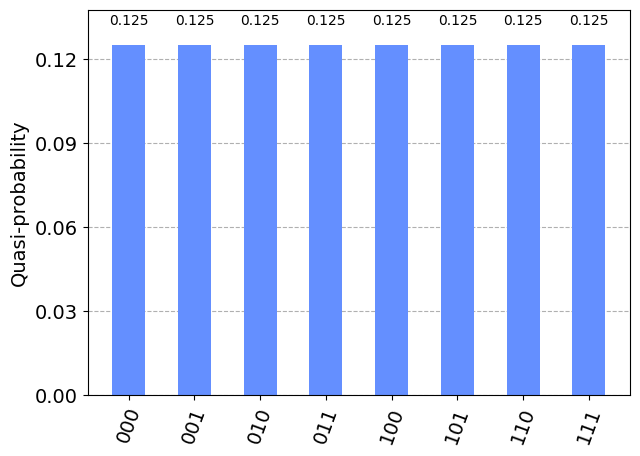

In [72]:
plot_histogram(QAOA_objective.set_circuit(theta=theta_f).get_state_probabilities())